Ultralytics 8.3.246 🚀 Python-3.13.5 torch-2.9.1 MPS (Apple M2)
WARNING ⚠️ imgsz=[640] must be multiple of max stride 14, updating to [644]

image 1/1 /Users/kimyoungjin/Projects/batman/test_8.jpeg: 644x644 3 yellow overhead crane hooks, 338.1ms
Speed: 271.5ms preprocess, 338.1ms inference, 111.0ms postprocess per image at shape (1, 3, 644, 644)
Results saved to /Users/kimyoungjin/Projects/batman/runs/test26


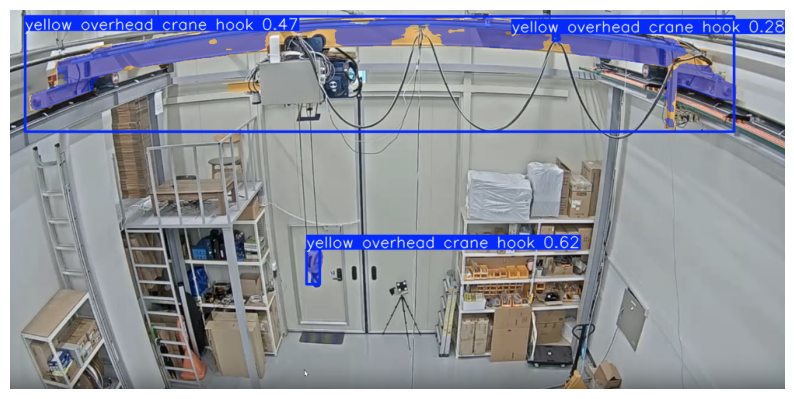

In [3]:
from ultralytics.models.sam import SAM3SemanticPredictor  # noqa
import matplotlib.pyplot as plt  # noqa
from pathlib import Path

# base_dir = Path(__file__).parent
base_dir = Path.cwd()

# Initialize predictor with configuration
overrides = dict(
    conf=0.25,
    task="segment",
    mode="predict",
    model="sam3.pt",
    half=True,  # Use FP16 for faster inference
    save=True,
    device="mps",
    project=base_dir / "runs",  # 👈 Save directory
    name="test",  # 👈 Subfolder name
)
predictor = SAM3SemanticPredictor(overrides=overrides)

# Set image once for multiple queries
predictor.set_image("test_8.jpeg")

# Query with multiple text prompts
results = predictor(text=["yellow overhead crane hook"])

annot = results[0].plot()  # numpy image in BGR
plt.figure(figsize=(10, 6))
plt.imshow(annot[..., ::-1])  # BGR -> RGB
plt.axis("off")
plt.show()

# Works with descriptive phrases
# results = predictor(text=["person with red cloth", "person with blue cloth"])

# # Query with a single concept
# results = predictor(text=["a person"])